# Importing tools

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [5]:
df = pd.read_csv("C:\\Users\mariy\\Downloads\\Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Exploring Dataset

In [6]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

There are no missing values 

In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
churn_rate = df['Exited'].mean()
print('Churn Rate:', churn_rate)

Churn Rate: 0.2038


In [10]:
# Compare churn rate by gender
gender_churn = df.groupby('Gender')['Exited'].mean()
print('Churn Rate by Gender:')
print(gender_churn)

Churn Rate by Gender:
Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


In [12]:
ct = pd.crosstab(df['Gender'], df['Exited'])
ct

Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


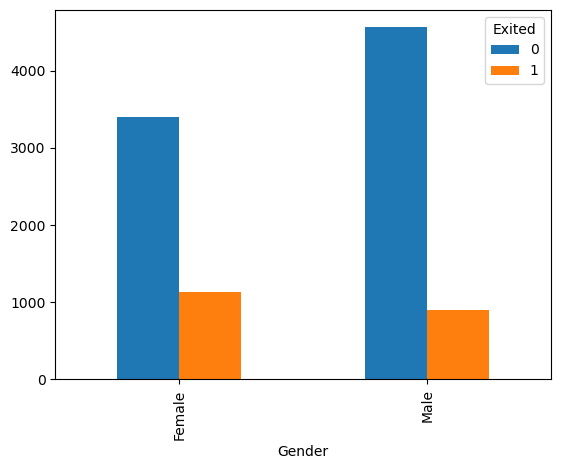

In [13]:
ct.plot(kind="bar");


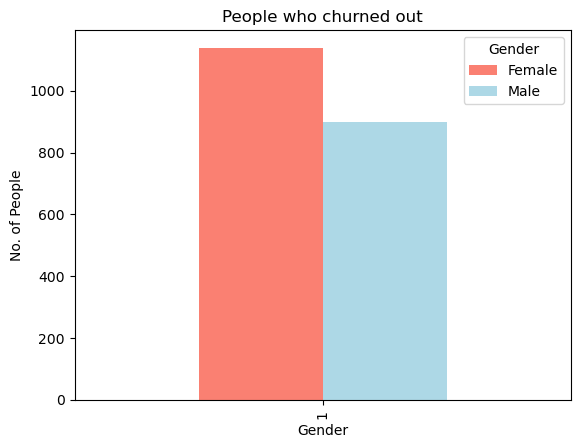

In [16]:
pd.crosstab(df.Exited[df.Exited==1], df.Gender).plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel("Gender")
plt.ylabel("No. of People")
plt.title("People who churned out");

In [17]:
# Calculate average balance for churned and retained customers
avg_balance_churned = df[df['Exited'] == 1]['Balance'].mean()
avg_balance_retained = df[df['Exited'] == 0]['Balance'].mean()
print('Average Balance - Churned:', avg_balance_churned)
print('Average Balance - Retained:', avg_balance_retained)

Average Balance - Churned: 91109.47600588812
Average Balance - Retained: 72742.75066314996


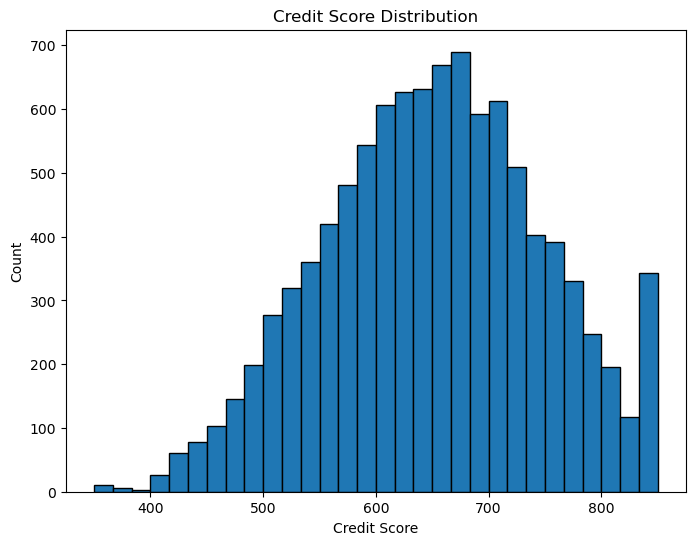

In [18]:
# Analyze the distribution of credit scores
plt.figure(figsize=(8, 6))
plt.title('Credit Score Distribution')
plt.hist(df['CreditScore'], bins=30, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()


In [ ]:
# Handle categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'])

# Remove irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

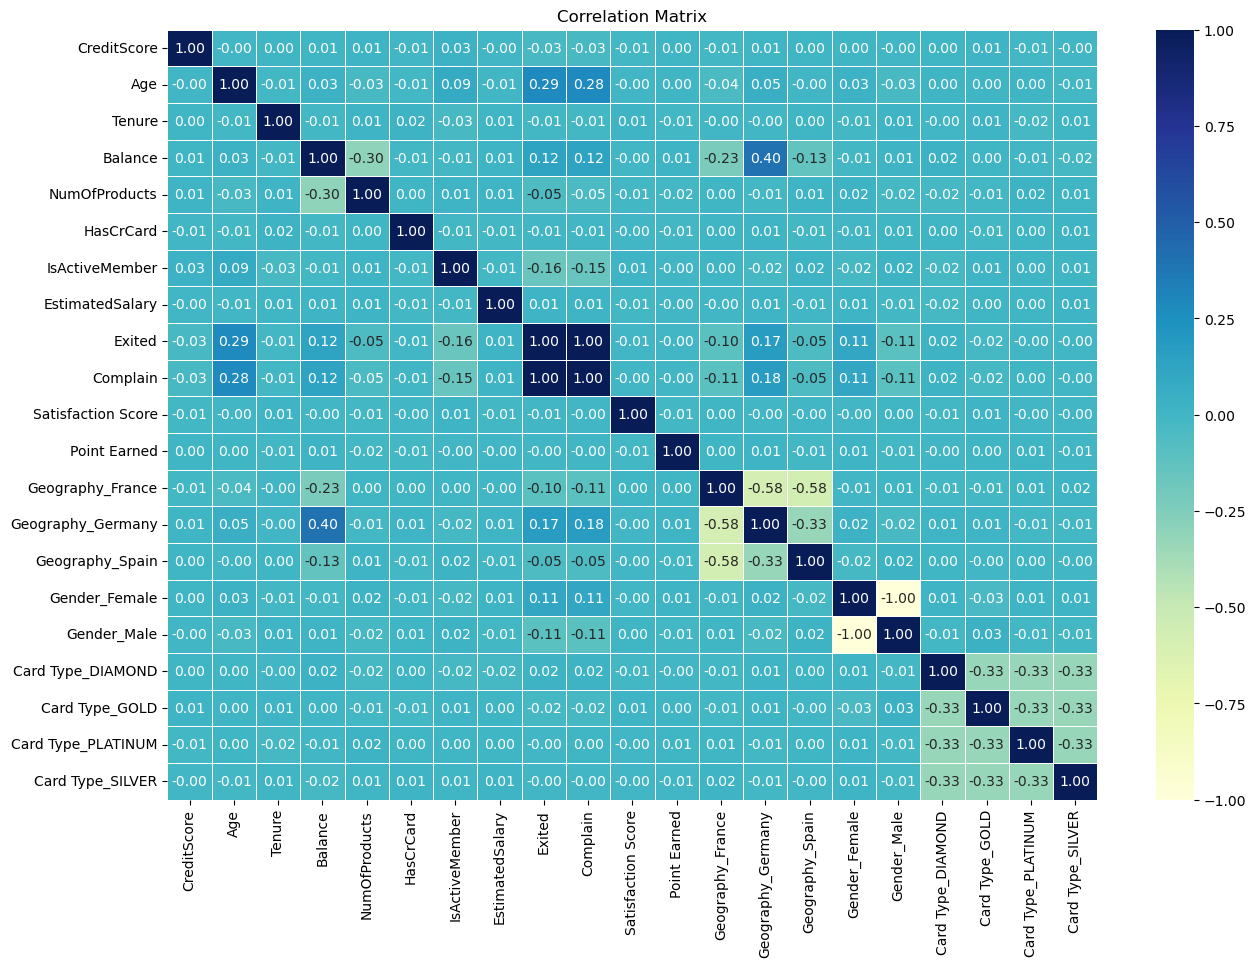

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

# Model Implementation

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
rfc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', rfc_accuracy)

Accuracy: 0.999


In [57]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

knc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', knc_accuracy)

Accuracy: 0.765


In [58]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', reg_accuracy)

Accuracy: 0.799


In [64]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', svc_accuracy)

Accuracy: 0.8035


In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', gnb_accuracy)

Accuracy: 0.8


In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', dtc_accuracy)

Accuracy: 0.998


In [67]:
model_accuracy = {
    "KNeighborsClassifier" : knc_accuracy*100,
    "Random Forest Classifier" : rfc_accuracy*100,
    "Logistic Regression" : reg_accuracy*100,
    "SVC" : svc_accuracy*100,
    "Gaussian Naive Bayes" : gnb_accuracy*100,
    "DecisionTreeClassifier" : dtc_accuracy*100
}
model_accuracy

{'KNeighborsClassifier': 76.5,
 'Random Forest Classifier': 99.9,
 'Logistic Regression': 79.9,
 'SVC': 80.35,
 'Gaussian Naive Bayes': 80.0,
 'DecisionTreeClassifier': 99.8}

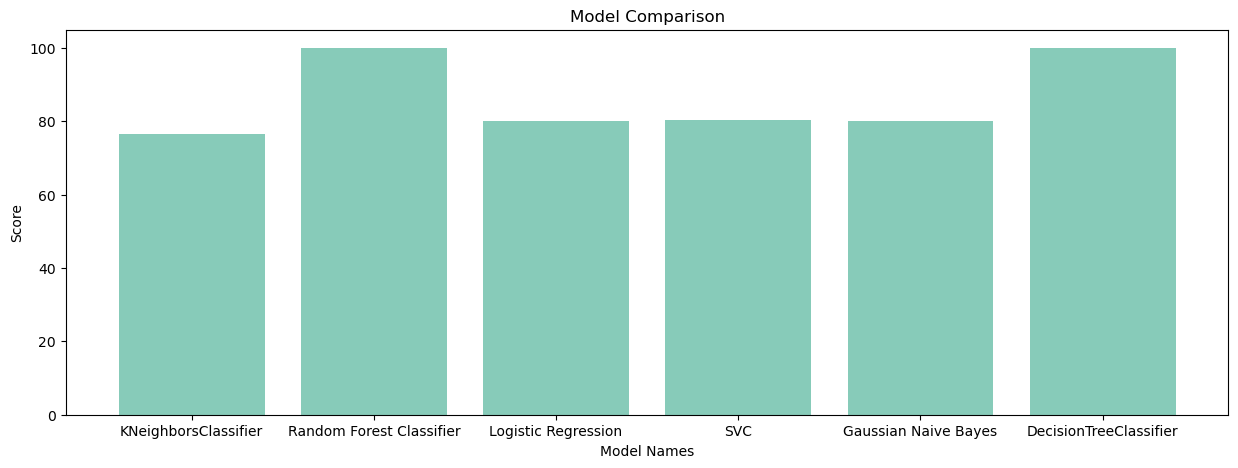

In [69]:
model_compare = pd.DataFrame(model_accuracy, index=["accuracy"])
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(model_compare.columns, model_compare.iloc[0], color="#87CBB9")
plt.xlabel("Model Names")
plt.ylabel("Score")
# plt.xticks(rotation=0)
plt.title("Model Comparison");